In [1]:
import sys
sys.path.append('./module')

from common import common, transform
from tracking.tracking import track
from person import data as pd
#from group import data as gd  # not found pyclustering
from display.display import display
import cv2

In [2]:
name = '09_05'
video_path = common.data_dir + '{0}/AlphaPose_{0}.mp4'.format(name)
out_dir = common.out_dir + '{}/'.format(name)
field_path = common.data_dir + 'field.png'
keypoints_path = common.data_dir + '{0}/{0}_alphapose-results.json'.format(name)
tracking_db_path = common.db_dir + '{}/tracking.db'.format(name)
person_db_path = common.db_dir + '{}/person.db'.format(name)
group_db_path = common.db_dir + '{}/group.db'.format(name)

In [3]:
# homography
field_raw = cv2.imread(field_path)
p_video = transform.homo[name][0]
p_field = transform.homo[name][1]
homo = transform.Homography(p_video, p_field, field_raw.shape)

In [5]:
track(keypoints_path, tracking_db_path, name)

drop table if exists "Tracking"
create table if not exists "Tracking"(Person_ID integer, Frame_No integer, Keypoints array, Vector array, Average array)
insert into "Tracking" (Person_ID, Frame_No, Keypoints, Vector, Average) values (?,?,?,?,?)


In [6]:
pd.make_database(tracking_db_path, person_db_path, homo)

select * from "Tracking" 
drop table if exists "Person"
create table if not exists "Person"(Person_ID integer, Frame_No integer, Keypoints array, Face_Vector array, Body_Vector array)
insert into "Person" (Person_ID, Frame_No, Keypoints, Face_Vector, Body_Vector) values (?,?,?,?,?)


In [7]:
#gd.make_database(person_db_path, group_db_path, homo)

In [8]:
display(video_path, out_dir, person_db_path, group_db_path, field_raw, homo)

select * from "Person" 
18044
18044
18044


In [9]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

In [10]:
show_local_mp4_video('./out/05_05/Person.mp4')

In [11]:
%%HTML
<video width="640" height="480" controls>
  <source src="./out/05_05/Person.mp4" type="video/mp4">
</video>

In [2]:
import sys
sys.path.append('./module')
import module.display.video as video

In [3]:
v = video.Capture('./out/05_05/Person.mp4')

In [8]:
frame = v.read()

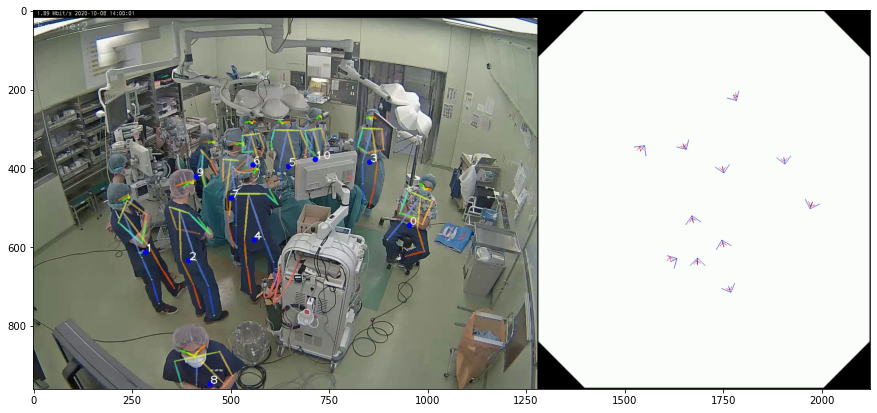

In [9]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15.0, 10.0))
plt.imshow(frame)
plt.show()